In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import os
import cv2
import pandas as pd

In [0]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D 
from keras.optimizers import RMSprop, Adam, Adadelta
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten


Using TensorFlow backend.


In [0]:
def read_and_normalize_train_data():
    train_data, train_target = load_train()
    train_data = np.array(train_data, dtype=np.float64)
    train_target = np.array(train_target, dtype=np.float64)
    m = train_data.mean()
    s = train_data.std()

    print ('Train mean, sd:', m, s )
    train_data -= m
    train_data /= s
    print('Train shape:', train_data.shape)
    print(train_data.shape[0], 'train samples')
    return train_data, train_target

In [0]:
image_size = 150

min1 = 0
max1 = 400

def load_train():
    X_train = []
    y_train = []
    heights = pd.read_csv('drive/My Drive/INTERN/socis/CNN/train_off.csv')
    print('Read train images')
    for index, row in heights.iterrows():
        try:
            
            image_path = os.path.join('drive/My Drive/INTERN/socis/CNN/Final_Dataset', str((row['Path'])) )
            print(image_path,"imagepath")
            img = cv2.imread(image_path, cv2.IMREAD_COLOR)
            img =  img[83:441, 30:510]
            img = cv2.resize(img, (image_size, image_size) ).astype('uint8')
#             img = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (image_size, image_size) ).astype('uint8')
#         img = img.transpose((2,0,1))
            X_train.append(img)
            y_train.append( [ float(row['current_stabilised_value (mA)']) ])
#             print(y_train)
        
            
            
            
            
            

        except Exception as e:
            print(str(e))
#         image_path = os.path.join('newDataset', str((row['Path'])) )
#         img = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (image_size, image_size) ).astype('uint8')
# #         img = img.transpose((2,0,1))
#         X_train.append(img)
#         y_train.append( [ float(row['current_max/min_value (mA)']) ])

    return X_train, y_train

In [0]:
def create_model():
    nb_filters = 8
    nb_conv = 5
    
    
    ##model building
    model = Sequential()
    
    
    
#     -------------------------------------------------------------------------------------------------------------------------------------
    #convolutional layer with rectified linear unit activation
#     model.add(Conv2D(32, kernel_size=(3, 3),
#                      activation='relu',
#                      input_shape=(image_size, image_size, 3)))
    #32 convolution filters used each of size 3x3
    #again
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     #64 convolution filters used each of size 3x3
#     #choose the best features via pooling
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     #randomly turn neurons on and off to improve convergence
#     model.add(Dropout(0.25))
#     #flatten since too many dimensions, we only want a classification output
#     model.add(Flatten())
#     #fully connected to get all relevant data
#     model.add(Dense(128, activation='relu'))
#     #one more dropout for convergence' sake :) 
#     model.add(Dropout(0.5))
    #output a softmax to squash the matrix into output probabilities
#     model.add(Dense(num_category, activation='softmax'))

    
    
    
    
    
    
#     -------------------------------------------------------------------------------------------------------------------------------------
    

#     model = Sequential()
#     model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1'))
#     model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool'))

#     # Block 2
#     model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
#     model.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool'))

#     # Block 3
#     model.add (Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
#     model.add (Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
#     model.add (Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
#     model.add (MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool'))

#     # Block 4
#     model.add (Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
#     model.add (Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
#     model.add (Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
#     model.add(MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool'))

#     # Block 5
#     model.add( Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
#     model.add (Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
#     model.add (Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
#     model.add ( MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool'))

#     model.add(Flatten(name='flatten'))
#     model.add (Dense(4096, activation='relu', name='fc1'))
#     model.add ( Dense(4096, activation='relu', name='fc2'))
#     model.add(Dense(1))
#     model.add(Activation('linear'))


#     -------------------------------------------------------------------------------------------------------------------------------------



    

    model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                            border_mode='valid',
                            input_shape=(image_size, image_size, 3) ) )
    model.add(Activation('relu'))

    model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
    model.add(Activation('relu'))

    model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
    model.add(Activation('relu'))

    model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

#     model.add(Convolution2D(nb_filters*2, nb_conv, nb_conv))
#     model.add(Activation('relu'))
    
#     model.add(Convolution2D(nb_filters*2, nb_conv, nb_conv))
#     model.add(Activation('relu'))

    model.add(Convolution2D(nb_filters*2, nb_conv, nb_conv))
    model.add(Activation('relu'))



    model.add(Convolution2D(nb_filters*2, nb_conv, nb_conv))
    model.add(Activation('relu'))

    model.add(Convolution2D(nb_filters*2, nb_conv, nb_conv))
    model.add(Activation('relu'))
    
#     model.add(Convolution2D(nb_filters*2, nb_conv, nb_conv))
#     model.add(Activation('relu'))

    model.add(Convolution2D(nb_filters*2, nb_conv, nb_conv))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('linear'))

    model.compile(loss='mean_squared_error', optimizer=Adadelta())
    return model

In [0]:
def train_model(batch_size = 8, nb_epoch = 2):
    from sklearn.preprocessing import RobustScaler
    num_samples = 370
    cv_size = 0.2

    train_data, train_target = read_and_normalize_train_data()
    train_data = train_data[0:num_samples,:,:,:]
    train_target = train_target[0:num_samples]
#     print(train_target)
    train_target =  (train_target + 200 - min1)/(max1 - min1)
#     print(train_target)

    X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=cv_size, random_state=56741)
#     Y_train =( y_train - min1 )/(max1 - min1)
#     scaler_rob_y = MinMaxScaler().fit(y_train) 
#     Y_train = scaler_rob_y.transform(y_train)
#     Y_valid = scaler_rob_y.transform(y_valid)



    model = create_model()
    history = model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_valid, y_valid) )

    predictions_valid = (model.predict(X_valid, batch_size=8, verbose=1))

#     prt(y_valid,"y")
    y1 =  (( y_valid.flatten() ) * ( max1 - min1)) + min1
#     print(predictions_valid,"p")
#     predictions_valid = scaler_rob_y.inverse_transform(predictions_valid.reshape(-1, 1))
    y2 = ((predictions_valid.flatten() ) * ( max1 - min1)) + min1
    print(y1,"y1")
    print(y2,"y2")
    from sklearn.metrics import r2_score
    r2 = r2_score(y_valid, predictions_valid) 
    print(r2,"r2")
#     compare = pd.DataFrame(data={'original':y_valid.reshape((cv_size,)),
#              'prediction':predictions_valid.reshape((cv_size,))})
#     compare.to_csv('compare.csv')

    return model, history

In [0]:
model1, history = train_model(nb_epoch = 50)



Read train images
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_2_20181031_173628_104.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_4_20181031_173921_104.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_2_20181102_084723_103.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_4_20181102_085018_103.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_2_20181102_090016_102.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_4_20181102_090312_102.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_2_20181031_163423_105.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_4_20181031_164012_105.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_2_20190507_200720_023.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_4_20190507_201049_023.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Final_Dataset/OFF_6_20190507_201417_023.BMP imagepath
drive/My Drive/INTERN/socis/CNN/Fina

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5), input_shape=(150, 150,..., padding="valid")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:88: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (5, 5))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:109: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: UserWarning: Update yo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Train on 296 samples, validate on 74 samples
Epoch 1/50
296/296 [==============================] - 14s 49ms/step - loss: 1.2545 - val_loss: 1.4617
Epoch 2/50
296/296 [==============================] - 6s 20ms/step - loss: 1.1127 - val_loss: 1.4344
Epoch 3/50
296/296 [==============================] - 6s 20ms/step - loss: 1.0942 - val_loss: 1.4443
Epoch 4/50
296/296 [==============================] - 6s 20ms/step - loss: 1.1325 - val_loss: 1.5374
Epoch 5/50
296/296 [==============================] - 6s 20ms/step - loss: 1.1000 - val_loss: 1.4116
Epoch 6/50
296/296 [==============================] - 6s 20ms/step - loss: 1.1103 - val_loss: 1.4155
Epoch 7/50
296/296 [==============================] - 6s 20ms/step - loss: 1.0943 - val_loss: 1.3885
Epoch 8/50
296/296 [==============================] - 6s 20ms/step - loss: 1.0760 - val_loss: 1.3916
Epoch 9/50
296/296 [==============================] - 6s 20ms/step - loss: 1.0865 - val_loss: 1.3808
Epoch 10/50
296/296 [=======================

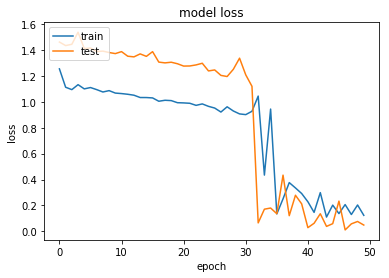

In [0]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [0]:
# num_samples = 370
# cv_size = 0.3

# train_data, train_target = read_and_normalize_train_data()
# train_data = train_data[0:num_samples,:,:,:]
# train_target = train_target[0:num_samples]
# #     print(train_target)
# train_target =  (train_target - min1)/(max1 - min1)
# #     print(train_target)

# X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_target, test_size=cv_size, random_state=56741)
# #     Y_train =( y_train - min1 )/(max1 - min1)

In [0]:
# predictions_valid = (model1.predict(X_valid, batch_size=8, verbose=1))

# #     print(y_valid,"y")
# y1 = ( y_valid.flatten() * ( max1 - min1)) + min1
# #     print(predictions_valid,"p")
# #     predictions_valid = scaler_rob_y.inverse_transform(predictions_valid.reshape(-1, 1))
# y2 = (predictions_valid.flatten() * ( max1 - min1)) + min1
# print(y1,"y1")
# print(y2,"y2")
# from sklearn.metrics import r2_score
# r2 = r2_score(y_valid, predictions_valid) 
# print(r2,"r2")